 ## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import

In [2]:
ds = pd.read_csv("model.csv")
ds.sample(15)

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
39749,39750,Female,25,1,D,36,Yes,< 1 Year,No,31159,152,94,0
39211,39212,Male,46,1,M,28,No,1-2 Year,No,38730,26,118,0
19817,19818,Male,25,1,C,41,Yes,< 1 Year,No,38651,152,253,0
28625,28626,Male,42,1,C,10,No,1-2 Year,Yes,20149,152,258,0
67796,67797,Male,40,1,B,28,Yes,1-2 Year,No,31726,26,282,0
99595,99596,Female,28,1,A,8,No,1-2 Year,Yes,38639,154,240,0
11438,11439,Female,29,1,M,28,No,< 1 Year,Yes,54454,122,171,1
83187,83188,Female,29,1,D,34,Yes,< 1 Year,No,32283,152,170,0
58573,58574,Female,32,1,A,8,No,< 1 Year,Yes,51089,26,100,1
19459,19460,Male,26,1,B,10,Yes,< 1 Year,No,22876,152,193,0


In [3]:
ds.info(verbose=True)
print(ds.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102351 entries, 0 to 102350
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    102351 non-null  int64 
 1   Gender                102351 non-null  object
 2   Age                   102351 non-null  int64 
 3   Driving_License       102351 non-null  int64 
 4   Licence_Type          97260 non-null   object
 5   Region_Code           102351 non-null  int64 
 6   Previously_Insured    102351 non-null  object
 7   Vehicle_Age           102351 non-null  object
 8   Vehicle_Damage        102351 non-null  object
 9   Annual_Premium        102351 non-null  int64 
 10  Policy_Sales_Channel  102351 non-null  int64 
 11  Seniority             102351 non-null  int64 
 12  Target                102351 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 10.2+ MB
(102351, 13)


In [4]:
ds.describe()

,id,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority,Target
count,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000
mean,51176.000000,39.867339,0.950259,26.519936,30748.636398,107.407900,154.527030,0.317271
std,29546.333038,14.935793,0.217410,12.904874,17544.726810,55.327295,83.735221,0.465416
min,1.000000,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25588.500000,25.000000,1.000000,15.000000,24435.500000,26.000000,82.000000,0.000000
50%,51176.000000,39.000000,1.000000,28.000000,31943.000000,124.000000,155.000000,0.000000
75%,76763.500000,50.000000,1.000000,35.000000,39774.000000,152.000000,227.000000,1.000000
max,102351.000000,85.000000,1.000000,52.000000,540165.000000,163.000000,299.000000,1.000000


### Null Values

In [5]:
#Null values
ds.isna().sum() 

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [6]:
#See if Licence_Type=null corresponds to Driving_Licence=0
ds_by_licence = ds.groupby(['Driving_License'])
ds_by_licence.get_group(0)

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
44,45,Female,48,0,NaN,3,No,1-2 Year,Yes,22675,156,141,1
49,50,Female,22,0,NaN,3,Yes,< 1 Year,No,21098,152,95,0
67,68,Female,49,0,NaN,28,No,> 2 Years,Yes,26535,26,223,1
98,99,Female,28,0,NaN,10,Yes,< 1 Year,No,21971,152,74,0
110,111,Female,47,0,NaN,41,No,1-2 Year,Yes,33395,124,168,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102217,102218,Female,70,0,NaN,36,Yes,1-2 Year,No,35613,26,255,0
102224,102225,Female,23,0,NaN,6,Yes,< 1 Year,No,32172,152,292,0
102225,102226,Female,44,0,NaN,29,No,1-2 Year,Yes,35115,26,101,1
102293,102294,Male,34,0,NaN,32,No,1-2 Year,Yes,2630,156,113,1


In [7]:
#Convert Licence_Type=NaN into N 
ds.Licence_Type = ds.Licence_Type.fillna('N')
ds.isna().sum() 

id                      0
Gender                  0
Age                     0
Driving_License         0
Licence_Type            0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Seniority               0
Target                  0
dtype: int64

### Duplicates

In [8]:
ds.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
102346    False
102347    False
102348    False
102349    False
102350    False
Length: 102351, dtype: bool

In [9]:
ds.duplicated().sum() #There are no duplicates

0

### Distributions

#### Categorical Data

In [10]:
#Convert 'Driving_Licence' into object type
ds['Driving_License'] = ds['Driving_License'].astype(object)
ds.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102351 entries, 0 to 102350
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    102351 non-null  int64 
 1   Gender                102351 non-null  object
 2   Age                   102351 non-null  int64 
 3   Driving_License       102351 non-null  object
 4   Licence_Type          102351 non-null  object
 5   Region_Code           102351 non-null  int64 
 6   Previously_Insured    102351 non-null  object
 7   Vehicle_Age           102351 non-null  object
 8   Vehicle_Damage        102351 non-null  object
 9   Annual_Premium        102351 non-null  int64 
 10  Policy_Sales_Channel  102351 non-null  int64 
 11  Seniority             102351 non-null  int64 
 12  Target                102351 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 10.2+ MB


In [11]:
#Extract the subset of categorical variables
ds_categorical = ds.select_dtypes(include=['object'])
ds_categorical

,Gender,Driving_License,Licence_Type,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,Female,1,M,No,1-2 Year,Yes
1,Male,1,M,Yes,< 1 Year,No
2,Male,1,C,No,1-2 Year,Yes
3,Male,1,B,Yes,1-2 Year,No
4,Female,1,B,No,1-2 Year,Yes
...,...,...,...,...,...,...
102346,Female,1,B,Yes,< 1 Year,No
102347,Female,1,M,No,1-2 Year,Yes
102348,Male,1,M,No,> 2 Years,Yes
102349,Female,1,M,Yes,< 1 Year,No


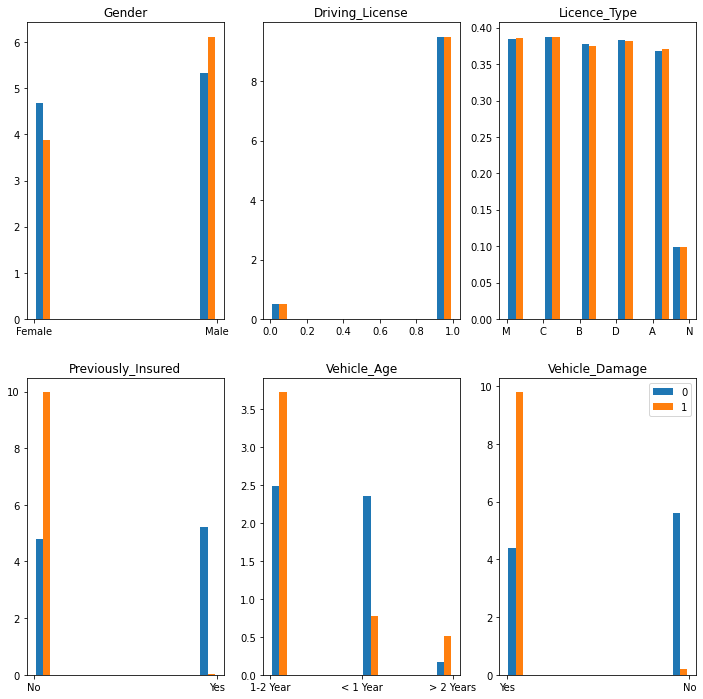

In [12]:
#Visualize the distributions of categorical data
ds_0 = ds_categorical[ds['Target']==0] # records wih target==1
ds_1 = ds_categorical[ds['Target']==1] # records wih target==0


fig, axes = plt.subplots(2, 3,figsize=[12,12])
axes = axes.flatten()
i=0
for x in ds_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([ds_0[x],ds_1[x]], density=True)
    plt.title(x)
    i+=1
plt.legend(labels=('0','1'))
plt.show()

In [13]:
#'Licence_Type' and 'Driving_License' seem not to be so informative with respect to 'Target'
#So, we drop these two features
ds = ds.drop(['Driving_License', 'Licence_Type'], axis=1)

In [14]:
print(ds.shape)

(102351, 11)


#### Numerical Data

In [15]:
#Extract the subset of numerical features
ds_numerical = ds.select_dtypes(include=['int64'])
ds_numerical

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,44,30,25741,154,152,0
1,2,23,3,2630,152,256,0
2,3,43,28,70720,52,224,0
3,4,60,28,48512,26,86,0
4,5,42,46,32169,124,132,0
...,...,...,...,...,...,...,...
102346,102347,25,32,34695,152,133,0
102347,102348,47,28,30564,26,114,1
102348,102349,72,8,52844,124,92,1
102349,102350,25,11,26343,152,127,0


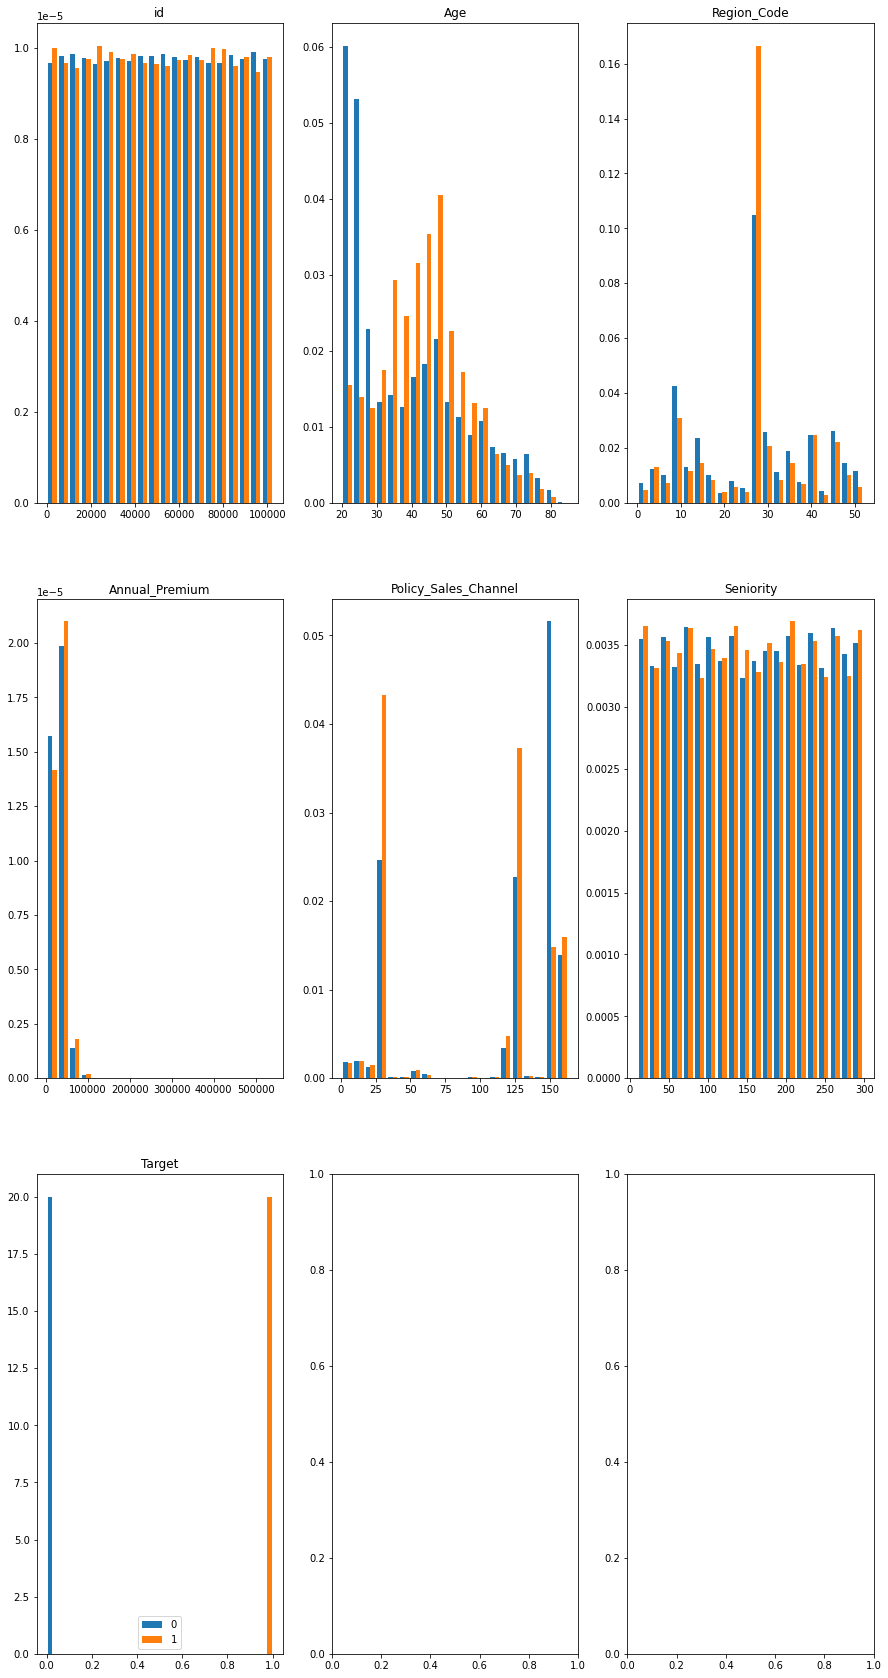

In [16]:
#Visualize the ditributions of numerical data
ds_0 = ds_numerical[ds['Target']==0] # records wih target==1
ds_1 = ds_numerical[ds['Target']==1] # records wih target==0


fig, axes = plt.subplots(3, 3,figsize=[15,30])
axes = axes.flatten()
i=0
for x in ds_numerical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([ds_0[x],ds_1[x]], bins=20, density=True)
    plt.title(x)
    i+=1
plt.legend(labels=('0','1'))
plt.show()

In [17]:
#'id', 'Seniority' and 'Annual_Premium' do not bring any additional information with respect to 'Target'
#We drop them
ds = ds.drop(['id', 'Annual_Premium', 'Seniority'], axis=1)

In [18]:
print(ds.shape)

(102351, 8)


### Convert Categorical Variables into Dummies

In [19]:
#Gender, Previously_Insured, Vehicle_Age, Vehicle_Damage must be converted into dummies

#Gender
Gender = pd.get_dummies(ds['Gender'],drop_first=True)  #Male=1, Female=0(we drop Female=0) 
Gender.columns = ['Male']

#Previously_Insured
Previously_Insured = pd.get_dummies(ds['Previously_Insured'],drop_first=True) #Yes=1, No=0
Previously_Insured.columns = ['Insured']

#Vehicle_Age
Vehicle_Age = pd.get_dummies(ds['Vehicle_Age'],drop_first=True) #1-2 Year, <1 Year, >2 Year (we drop 1-2 Year)

#Vehicle_Damage
Vehicle_Damage = pd.get_dummies(ds['Vehicle_Damage'],drop_first=True) #Yes=1, No=0
Vehicle_Damage.columns = ['Damage']

In [20]:
#Add the new columns 
new_ds = pd.concat([ds, Gender, Previously_Insured, 
                    Vehicle_Age, Vehicle_Damage], axis=1)
new_ds

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Target,Male,Insured,< 1 Year,> 2 Years,Damage
0,Female,44,30,No,1-2 Year,Yes,154,0,0,0,0,0,1
1,Male,23,3,Yes,< 1 Year,No,152,0,1,1,1,0,0
2,Male,43,28,No,1-2 Year,Yes,52,0,1,0,0,0,1
3,Male,60,28,Yes,1-2 Year,No,26,0,1,1,0,0,0
4,Female,42,46,No,1-2 Year,Yes,124,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,Female,25,32,Yes,< 1 Year,No,152,0,0,1,1,0,0
102347,Female,47,28,No,1-2 Year,Yes,26,1,0,0,0,0,1
102348,Male,72,8,No,> 2 Years,Yes,124,1,1,0,0,1,1
102349,Female,25,11,Yes,< 1 Year,No,152,0,0,1,1,0,0


In [21]:
#Drop the redundant columns 
Target = new_ds.loc[:,'Target']
clean_ds = new_ds.drop(['Gender', 'Target', 'Previously_Insured', 
                        'Vehicle_Age', 'Vehicle_Damage'], axis=1)
clean_ds = pd.concat([clean_ds, Target], axis=1) #Move 'Target' to the end
clean_ds

,Age,Region_Code,Policy_Sales_Channel,Male,Insured,< 1 Year,> 2 Years,Damage,Target
0,44,30,154,0,0,0,0,1,0
1,23,3,152,1,1,1,0,0,0
2,43,28,52,1,0,0,0,1,0
3,60,28,26,1,1,0,0,0,0
4,42,46,124,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
102346,25,32,152,0,1,1,0,0,0
102347,47,28,26,0,0,0,0,1,1
102348,72,8,124,1,0,0,1,1,1
102349,25,11,152,0,1,1,0,0,0


### Scaling

In [22]:
#Min-Max Scaling using the 0;1 range as for Dummy variables
from sklearn.preprocessing import MinMaxScaler

mm_scaler =  MinMaxScaler(copy=False,feature_range=(0, 1))

scaled_ds = pd.DataFrame(mm_scaler.fit_transform(clean_ds), columns = clean_ds.columns)

In [23]:
scaled_ds

,Age,Region_Code,Policy_Sales_Channel,Male,Insured,< 1 Year,> 2 Years,Damage,Target
0,0.369231,0.576923,0.944444,0.0,0.0,0.0,0.0,1.0,0.0
1,0.046154,0.057692,0.932099,1.0,1.0,1.0,0.0,0.0,0.0
2,0.353846,0.538462,0.314815,1.0,0.0,0.0,0.0,1.0,0.0
3,0.615385,0.538462,0.154321,1.0,1.0,0.0,0.0,0.0,0.0
4,0.338462,0.884615,0.759259,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
102346,0.076923,0.615385,0.932099,0.0,1.0,1.0,0.0,0.0,0.0
102347,0.415385,0.538462,0.154321,0.0,0.0,0.0,0.0,1.0,1.0
102348,0.800000,0.153846,0.759259,1.0,0.0,0.0,1.0,1.0,1.0
102349,0.076923,0.211538,0.932099,0.0,1.0,1.0,0.0,0.0,0.0


## Data Pre-Processing

### Split into Train and Test

In [24]:
#Separate X and y (explanatory variables and target variable)
X = scaled_ds.iloc[:,0:-1]
y = scaled_ds.iloc[:,-1] 

#X.head()
#y.head()

Target
0    69878
1    32473
dtype: int64


<AxesSubplot:title={'center':'Distribution of target'}, xlabel='Target'>

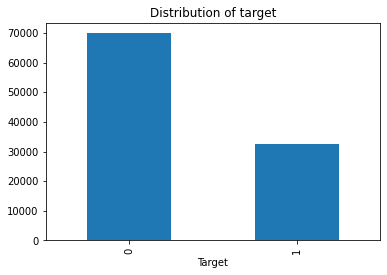

In [25]:
#Visualize the counts for each Target class
target_dist = clean_ds.groupby('Target').size()
print(target_dist)

%matplotlib inline

target_dist.plot.bar(x = '',y = '',title = 'Distribution of target')

In [167]:
from sklearn.model_selection import train_test_split

#Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30,
                                                    shuffle=False)
print(X_train.shape,X_test.shape)

(71645, 8) (30706, 8)


## Classification Tree

In [169]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [170]:
y_pred

array([1., 0., 1., ..., 0., 0., 0.])

### GridSearch

In [171]:
#Define Classifier and Parameters
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,5,10,50],
              'min_samples_split': [3,5,10],
              'min_samples_leaf': [2,4]}

In [172]:
#Define the GridSearch
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)

In [173]:
#Train the Classifier
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [174]:
#Summarize the results
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.692263 using {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.691247 (0.003719) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.691247 (0.003719) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.691247 (0.003719) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.691247 (0.003719) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3}
0.691247 (0.003719) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.691247 (0.003719) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.676797 (0.004322) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.676797 (0.004322) with: {'criterion': 'entropy', 'max_depth':

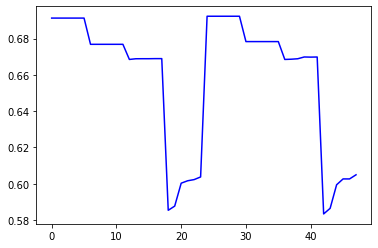

0.6922631365404156


In [175]:
import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

print(gs.best_score_)

### Test the best model

In [177]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

### Metrics

In [178]:
#F1 scores
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6912317898912523
--
***RESULTS ON TEST SET***
f1_score:  0.6910256410256411


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.69      0.79     20960
         1.0       0.57      0.88      0.69      9746

    accuracy                           0.75     30706
   macro avg       0.75      0.79      0.74     30706
weighted avg       0.81      0.75      0.76     30706



In [94]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[14370  6590]
 [ 1122  8624]]


<AxesSubplot:>

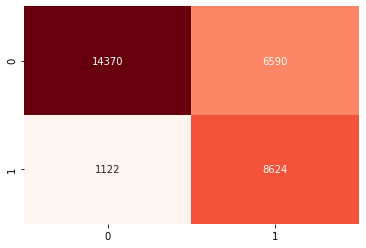

In [95]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False)

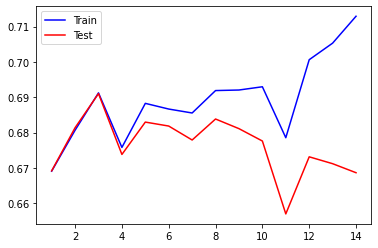

In [96]:
#Compare F1 scores for Train and Test with respect to max_depth
score_train=[]
score_test=[]

max_depth=range(1,15,1)

for i in max_depth:
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train,y_train)
    y_pred_train = tree.predict(X_train)
    y_pred_test = tree.predict(X_test)
    score_train.append( metrics.f1_score(y_train, y_pred_train))
    score_test.append( metrics.f1_score(y_test, y_pred_test))


plt.plot (max_depth,score_train, color='blue', alpha=1.00)
plt.plot (max_depth,score_test, color='red', alpha=1.00)
plt.legend(('Train', 'Test'))
plt.show()

### ROC curve and AUC

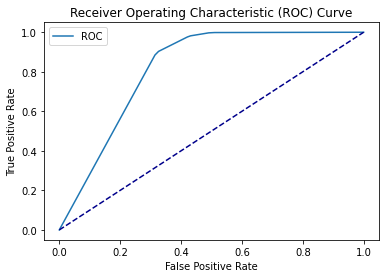

AUC: 0.82


In [97]:
from sklearn import metrics
model = best_model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### Graphical Representation

In [98]:
X_train.columns.tolist()

['Age',
 'Region_Code',
 'Policy_Sales_Channel',
 'Male',
 'Insured',
 '< 1 Year',
 '> 2 Years',
 'Damage']

In [99]:
from sklearn import tree
r = tree.export_text(model,feature_names=X_test.columns.tolist())
print(r)

|--- Damage <= 0.50
|   |--- Insured <= 0.50
|   |   |--- Policy_Sales_Channel <= 0.94
|   |   |   |--- class: 0.0
|   |   |--- Policy_Sales_Channel >  0.94
|   |   |   |--- class: 0.0
|   |--- Insured >  0.50
|   |   |--- Policy_Sales_Channel <= 0.01
|   |   |   |--- class: 0.0
|   |   |--- Policy_Sales_Channel >  0.01
|   |   |   |--- class: 0.0
|--- Damage >  0.50
|   |--- Age <= 0.10
|   |   |--- Policy_Sales_Channel <= 0.92
|   |   |   |--- class: 0.0
|   |   |--- Policy_Sales_Channel >  0.92
|   |   |   |--- class: 0.0
|   |--- Age >  0.10
|   |   |--- Insured <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- Insured >  0.50
|   |   |   |--- class: 0.0



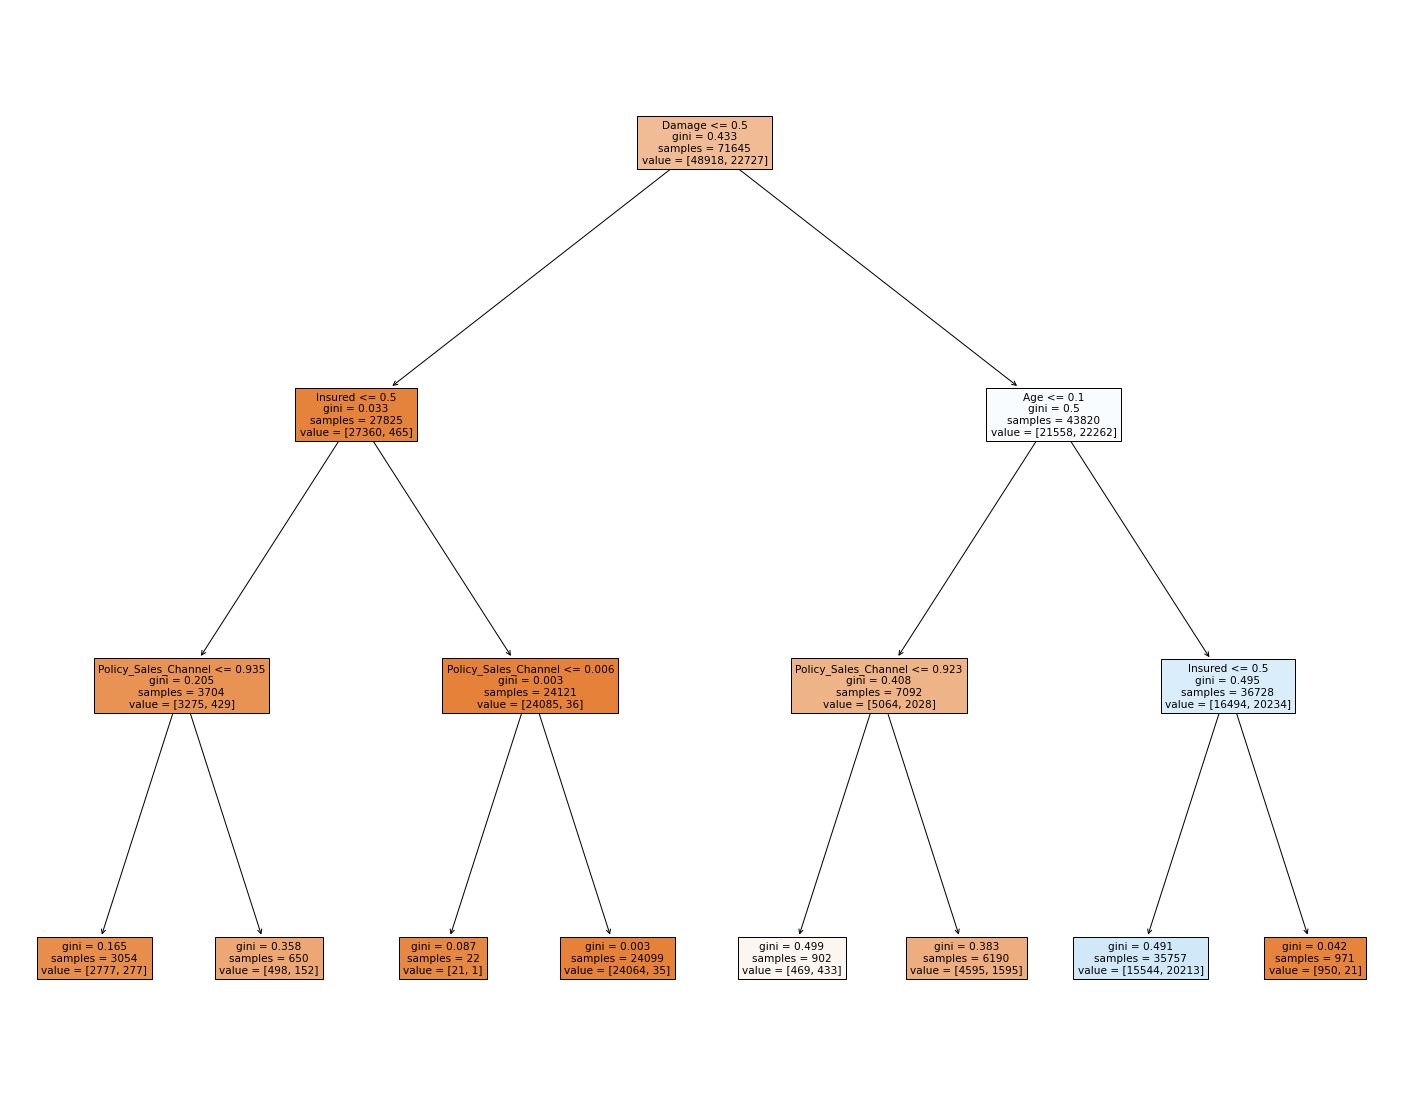

In [100]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X_train.columns,
                   filled=True)
#fig.savefig("decision_tree.png")

## Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=6, min_samples_split=4, min_samples_leaf=2)

rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)
y_pred_train = rand_forest.predict(X_train)

### Metrics

In [102]:
#F1 scores
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6859701719099844
--
***RESULTS ON TEST SET***
f1_score:  0.6813880126182966


In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82     20960
         1.0       0.60      0.79      0.68      9746

    accuracy                           0.77     30706
   macro avg       0.74      0.77      0.75     30706
weighted avg       0.79      0.77      0.77     30706



In [104]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15867  5093]
 [ 2078  7668]]


<AxesSubplot:>

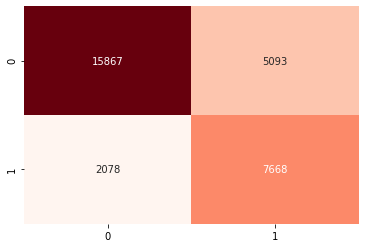

In [105]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False)

### ROC curve and AUC

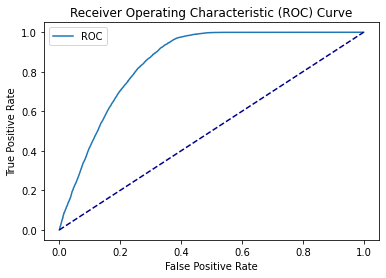

AUC: 0.85


In [106]:
from sklearn import metrics

y_probs = rand_forest.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Naive Bayes Classifier

In [107]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [108]:
y_pred

array([1., 0., 1., ..., 1., 0., 1.])

### Metrics

In [109]:
#F1 scores
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6859701719099844
--
***RESULTS ON TEST SET***
f1_score:  0.6886789010908826


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.61      0.75     20960
         1.0       0.53      0.97      0.69      9746

    accuracy                           0.72     30706
   macro avg       0.76      0.79      0.72     30706
weighted avg       0.84      0.72      0.73     30706



In [111]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[12735  8225]
 [  308  9438]]


<AxesSubplot:>

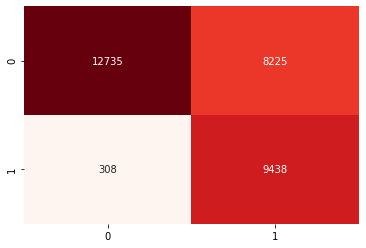

In [112]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False)

### ROC curve and AUC

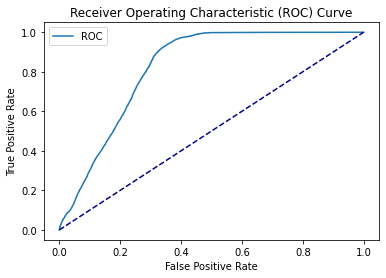

AUC: 0.82


In [113]:
from sklearn import metrics

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Multi-layer Perceptron Classifier

In [114]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(5, 2),
                      activation='relu', alpha=0.01, batch_size='auto',              
                      learning_rate='constant', learning_rate_init=0.001,
                      max_iter=200, solver='lbfgs', tol=0.01,
                      validation_fraction=0.2, verbose=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [115]:
y_pred

array([1., 0., 1., ..., 1., 0., 1.])

### GridSearch

In [116]:
#Define Classifier and Parameters
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(5, 2),(10,5,2)],  
              "max_iter": [5000], 
              "alpha": [0.1,1,10]}

In [117]:
#Define the GridSearch
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [118]:
#Fit the GridSearch
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [119]:
#Print the results of the GridSearch
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.674265 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5, 2), 'max_iter': 5000}
0.657198 (0.007391) with: {'alpha': 0.1, 'hidden_layer_sizes': (5, 2), 'max_iter': 5000}
0.674265 (0.008187) with: {'alpha': 0.1, 'hidden_layer_sizes': (10, 5, 2), 'max_iter': 5000}
0.650900 (0.009784) with: {'alpha': 1, 'hidden_layer_sizes': (5, 2), 'max_iter': 5000}
0.215075 (0.304161) with: {'alpha': 1, 'hidden_layer_sizes': (10, 5, 2), 'max_iter': 5000}
0.319314 (0.233490) with: {'alpha': 10, 'hidden_layer_sizes': (5, 2), 'max_iter': 5000}
0.298419 (0.214356) with: {'alpha': 10, 'hidden_layer_sizes': (10, 5, 2), 'max_iter': 5000}


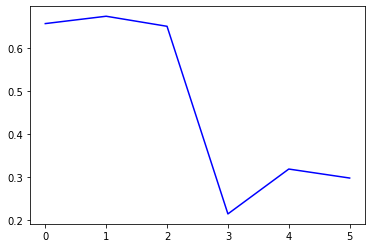

0.6742648015971766


In [120]:
import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

print(gs.best_score_)

### Test the best model

In [121]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

### Metrics

In [122]:
#F1 scores
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6727240821260748
--
***RESULTS ON TEST SET***
f1_score:  0.6690430490814367


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82     20960
         1.0       0.60      0.75      0.67      9746

    accuracy                           0.76     30706
   macro avg       0.74      0.76      0.74     30706
weighted avg       0.78      0.76      0.77     30706



In [124]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[16144  4816]
 [ 2426  7320]]


<AxesSubplot:>

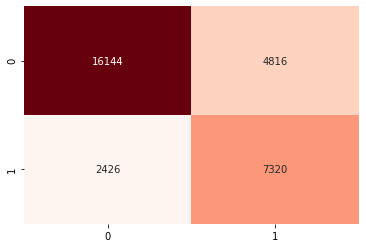

In [125]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False)

### ROC curve and AUC

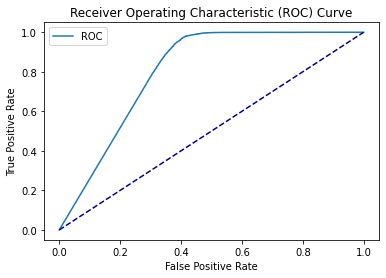

AUC: 0.80


In [127]:
from sklearn import metrics

model = best_model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_probs = model.predict_proba(X_test)  

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## AdaBoost

In [128]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost = AdaBoostClassifier(n_estimators=20, base_estimator=DecisionTreeClassifier(max_depth=10))
adaboost.fit(X_train, y_train)

y_pred_train = adaboost.predict(X_train)
y_pred = adaboost.predict(X_test)

### GridSearch

In [63]:
#Define Classifier and Parameters
from sklearn.model_selection import GridSearchCV

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [100, 500, 1000, 2000],
              'learning_rate' : [0.0001, 0.01, 0.1, 1.0]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 1.0],
                         'n_estimators': [100, 500, 1000, 2000]},
             scoring='f1', verbose=10)

In [129]:
#Results of the GridSearch
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.674265 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5, 2), 'max_iter': 5000}
0.657198 (0.007391) with: {'alpha': 0.1, 'hidden_layer_sizes': (5, 2), 'max_iter': 5000}
0.674265 (0.008187) with: {'alpha': 0.1, 'hidden_layer_sizes': (10, 5, 2), 'max_iter': 5000}
0.650900 (0.009784) with: {'alpha': 1, 'hidden_layer_sizes': (5, 2), 'max_iter': 5000}
0.215075 (0.304161) with: {'alpha': 1, 'hidden_layer_sizes': (10, 5, 2), 'max_iter': 5000}
0.319314 (0.233490) with: {'alpha': 10, 'hidden_layer_sizes': (5, 2), 'max_iter': 5000}
0.298419 (0.214356) with: {'alpha': 10, 'hidden_layer_sizes': (10, 5, 2), 'max_iter': 5000}


### Test the best model

In [130]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

### Metrics

In [131]:
#F1 scores
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.7408441020040849
--
***RESULTS ON TEST SET***
f1_score:  0.6725891291642314


In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.65      0.76     20960
         1.0       0.54      0.89      0.67      9746

    accuracy                           0.73     30706
   macro avg       0.73      0.77      0.72     30706
weighted avg       0.80      0.73      0.74     30706



In [133]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[13672  7288]
 [ 1115  8631]]


<AxesSubplot:>

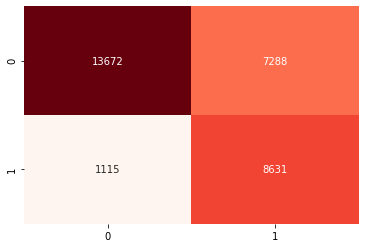

In [134]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False)

### ROC curve and AUC

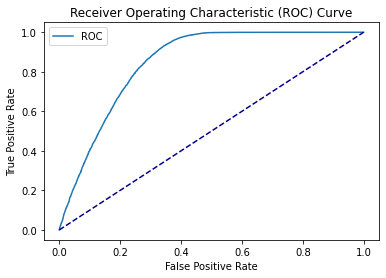

AUC: 0.85


In [135]:
adaboost = best_model

adaboost.fit(X_train,y_train)

y_probs = adaboost.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)